ABC analysis assumes that income-generating items in an inventory follow a Pareto distribution, where a very small percentage of items generate the most income. In this project, I’ll walk you through how we can perform ABC analysis with Machine Learning.

### Conventions of ABC Analysis
Using the conventions of ABC analysis, an inventory item is assigned a letter based on its importance:

- A articles represent 20% of articles, but contribute 70% of revenue
- B articles represent 30% of articles, but contribute 25% of revenue
- C articles represent 50% of articles, but contribute 5% of revenue

Keep in mind that these numbers are approximate and will vary widely depending on the actual distribution of sales. The main takeaway is that A items make up a small percentage of inventory but contribute the most to income, C items make up a large percentage of inventory but contribute the least to income and B items are somewhere around leaves in the middle.

### Importance of ABC Analysis
Inventory planning and warehousing strategies of an organization rely on ABC analysis to make any key decisions. For example, a warehouse manager typically wants A items closest to the shipping docks to reduce the time it takes to pick them up. This increases productivity and reduces labour costs.

### ABC Analysis with Machine Learning
The data used in this project comes from a popular online retailer dataset. The dataset only includes online sales of clothing throughout the summer. More importantly, it shows the number of units sold and the price sold, which will generate the revenue per item.

The goal of this project is to sort all the elements of the dataset into an ABC categorization based on their importance. When viewing the results, there should be relatively few A items that generate the majority of income and a large number of C items that do not generate much income.

### Data Preparation
Now, let’s get started with this task with data preparation. I will start this off by importing the necessary packages and reading the dataset:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
# read the data to a dataframe
df = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\ABC Analysis with Machine Learning\Summer Sales.csv")

I will add a new column to the data for revenue by simply multiplying the number of units sold by the price. It is possible that the price has changed over time, especially when flash sales have taken place, but without additional data to analyze, it is assumed that all items sold at a single, stable price:

In [2]:
df["revenue"] = df["units_sold"] * df["price"]

Now, lets visualize the revenue by using the seaborn package in python:

C:\Users\SHREE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

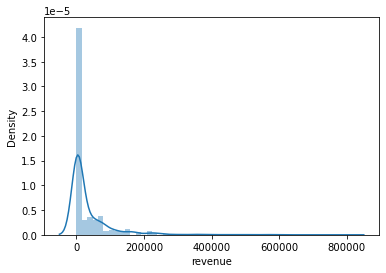

In [3]:
import seaborn as sns
sns.distplot(df["revenue"])

The graph above shows the Pareto distribution found in the data. The vast majority of articles generate less than € 200,000 in sales. At the same time, it shows that some of the items sell for between € 400,000 and € 800,000, which is contributing in the majority of the revenue.

Now, I’m going to define a function to categorize the amount of income generated by an item into bins, and then I’ll apply it to the data:

In [10]:
def bins(x):
    for bar in range(20000, 820000, 20000):
        if x <= bar:
            return bar
# Create new column to apply the bin function
df["rev_dist"] = df["revenue"].apply(lambda x: bins(x))

Now I’m going to create a pivot table to list the number of items that fall into each category:

In [11]:
df["count"] = 1
# Create a pivot table of the revenue distributions
pivot_table = pd.pivot_table(df, index = ["rev_dist"], values = ["count"], aggfunc = np.sum)

### Applying Machine Learning Algorithm
To properly train the model, it is not enough to just look at the income generated by each item. He must also know how income is distributed. This pivot table provides a very manageable data set that the model can train on. I will use the K-Means Clustering algorithm for this task of ABC Analysis:

In [12]:
# import model from SKLearn
from sklearn.cluster import KMeans
# K -clusters is equal to 3 because things will be sorted into A, B, and C
kmeans = KMeans(n_clusters=3)
kmeans.fit(pivot_table)

KMeans(n_clusters=3)

I will now add a new column to the pivot table giving the classification of the model. It should be noted that by default, scikit-learn’s K-means algorithm will rank items on a numeric scale instead of the alphabetical scale used in the ABC analysis. Therefore, each row will be labelled as zero, one, or two:

In [13]:
pivot_table["category"] = kmeans.labels_

Now, I will define a new dictionary to classify each row for the task of ABC analysis:

In [14]:
ABC_dict = {    
    0: "A",
    1: "C",
    2: "B"
}
pivot_table["ABC"] = pivot_table["category"].apply(lambda x: ABC_dict[x])

Now, remember that the model was trained on a pivot table. The elements have not yet been assigned an ABC classification. Instead, it was assigned an income classification:

In [16]:
df = pd.merge(df, pivot_table, on = "rev_dist", how ="left")
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,crawl_month,revenue,rev_dist,count_x,count_y,category_x,ABC_x,count,category_y,ABC_y
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,2020-08,1600.0,20000,1,1072,1,C,1072,1,C
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,2020-08,160000.0,160000,1,28,0,A,28,0,A
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,2020-08,800.0,20000,1,1072,1,C,1072,1,C
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,2020-08,40000.0,40000,1,120,2,B,120,2,B
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,2020-08,272.0,20000,1,1072,1,C,1072,1,C


This means that while we don’t immediately know which items fall into Category A, we do know that some income classifications are classified as A Items. As a result, we can just merge the main data frame and the PivotTable to give each item its ABC classification.

When analyzing the final distribution of the elements, it was found that:

- A-items represent 11.4% of articles, but 61.7% of turnover
- B-items represent 20.5% of items, but 30.7% of turnover
- C-items represent 68.1% of articles, but 7.6% of turnover